# Random Splitter & "Extremely Randomized Forest"

Pour aller plus loin, nous avons implementé la variante du `Random Forest` appelée `Extremely Randomized Forest`. Les changements sont dans la création des Decision Trees, ils utilisent pour cette version le splitter "random". Concrètement, on tire au hasard un seuil par feature et on choisit le meilleur seuil parmi ceux tirés.

## Chargement des données et prétraitement

In [1]:
import os
import sys

import matplotlib.pyplot as plt

if os.getcwd().endswith("docs"):
    sys.path.append(os.path.join(os.getcwd(), ".."))

from ias import DecisionTree, PCA, split_dataset, RandomForest
from ias.Datasets import Emnist
from ias.Metrics import accuracy_score, confusion_matrix, show_confusion_matrix

In [2]:
emnist_train_x, emnist_train_y, emnist_test_x, emnist_test_y = split_dataset(1000, Emnist)

pca = PCA(0.90)
pca.fit(emnist_train_x)

emnist_compressed_train_x = pca.compress(emnist_train_x)
emnist_compressed_test_x = pca.compress(emnist_test_x)

## Best splitter vs Random splitter

In [3]:
# Decision Tree avec meilleur splitter
emnist_tree_best = DecisionTree(max_depth=8, splitter="best")
emnist_tree_best.fit(emnist_compressed_train_x, emnist_train_y)
emnist_prediction_y_best = emnist_tree_best.predict(emnist_compressed_test_x)
emnist_train_prediction_best = emnist_tree_best.predict(emnist_compressed_train_x)

In [4]:
# Decision Tree avec random splitter
emnist_tree_random = DecisionTree(max_depth=8, splitter="random")
emnist_tree_random.fit(emnist_compressed_train_x, emnist_train_y)
emnist_prediction_y_random = emnist_tree_random.predict(emnist_compressed_test_x)
emnist_train_prediction_random = emnist_tree_random.predict(emnist_compressed_train_x)

Accuracy score best splitter : 0.579
Accuracy score random splitter : 0.567


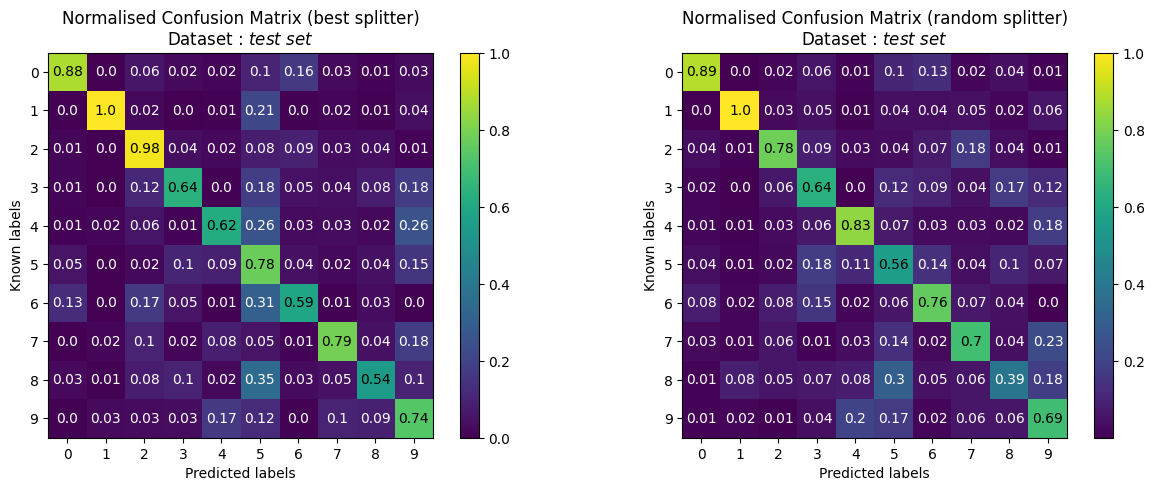

In [5]:
# Comparaison des résultats sur emnist sur le test_set
emnist_conf_matrix_best = confusion_matrix(Emnist.class_number, emnist_test_y,
                                           emnist_prediction_y_best)
emnist_conf_matrix_random = confusion_matrix(Emnist.class_number, emnist_test_y,
                                             emnist_prediction_y_random)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.set_title("Normalised Confusion Matrix (best splitter)\nDataset : $test\ set$")
show_confusion_matrix(emnist_conf_matrix_best, Emnist.class_names, ax=ax1, round_decimal=2)

ax2.set_title("Normalised Confusion Matrix (random splitter)\nDataset : $test\ set$")
show_confusion_matrix(emnist_conf_matrix_random, Emnist.class_names, ax=ax2, round_decimal=2)


print(
    f"Accuracy score best splitter : {accuracy_score(emnist_test_y, emnist_prediction_y_best):.3f}")
print(
    f"Accuracy score random splitter : {accuracy_score(emnist_test_y, emnist_prediction_y_random):.3f}")

Accuracy score best splitter : 0.791
Accuracy score random splitter : 0.695


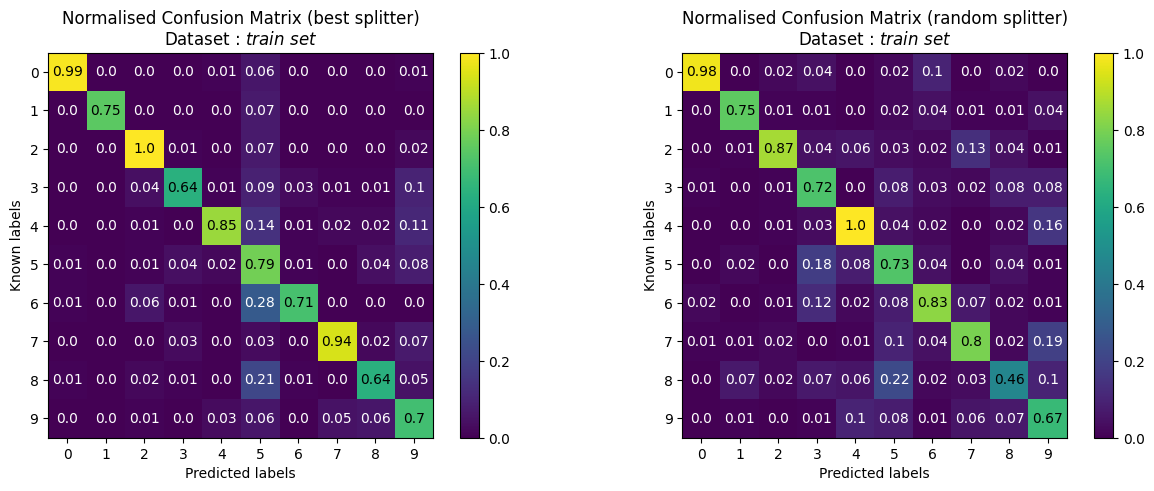

In [6]:
# Comparaison des résultats sur emnist sur le train_set pour l'overfitting
emnist_conf_matrix_best2 = confusion_matrix(Emnist.class_number, emnist_train_y,
                                            emnist_train_prediction_best)
emnist_conf_matrix_random2 = confusion_matrix(Emnist.class_number, emnist_train_y,
                                              emnist_train_prediction_random)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.set_title("Normalised Confusion Matrix (best splitter)\nDataset : $train\ set$")
show_confusion_matrix(emnist_conf_matrix_best2, Emnist.class_names, ax=ax1, round_decimal=2)

ax2.set_title("Normalised Confusion Matrix (random splitter)\nDataset : $train\ set$")
show_confusion_matrix(emnist_conf_matrix_random2, Emnist.class_names, ax=ax2, round_decimal=2)

print(
    f"Accuracy score best splitter : {accuracy_score(emnist_train_y, emnist_train_prediction_best):.3f}")
print(
    f"Accuracy score random splitter : {accuracy_score(emnist_train_y, emnist_train_prediction_random):.3f}")

### Conclusions

Même si les deux scores sont bas (le Decision Tree tout seul est peu efficace), on voit que tirer au hasard les seuils fait baisser la précision et l'efficacité de l'apprentissage. Mais alors pourquoi cet algorithme ?

Par contre, on observe peu d'_overfitting_ pour le best splitter et aucun pour le random.

## Random Forest vs Extremely Random Forest

In [7]:
# Random Forest best splitter
emnist_forest = RandomForest(tree_number=100, training_subset_size=250, max_depth=8, do_bagging=True)
emnist_forest.fit(emnist_compressed_train_x, emnist_train_y)
emnist_prediction_y_forest = emnist_forest.predict(emnist_compressed_test_x)
emnist_train_prediction_forest = emnist_forest.predict(emnist_compressed_train_x)

In [8]:
# Extremely Random Forest random splitter
emnist_forest_extr = RandomForest(tree_number=100, training_subset_size=250, max_depth=8, do_bagging=True,
                                  splitter="random")
emnist_forest_extr.fit(emnist_compressed_train_x, emnist_train_y)
emnist_prediction_y_forest_extr = emnist_forest_extr.predict(emnist_compressed_test_x)
emnist_train_prediction_forest_extr = emnist_forest_extr.predict(emnist_compressed_train_x)

Accuracy score normal Random Forest : 0.824
Accuracy score extremely Random Forest : 0.812


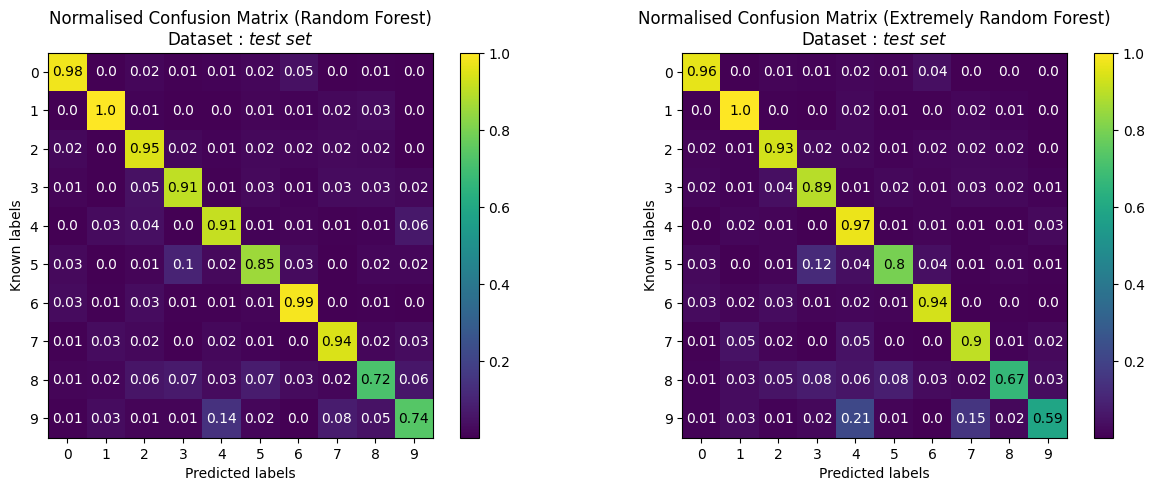

In [9]:
# Comparaison des résultats sur EMNIST sur le test_set
emnist_conf_matrix = confusion_matrix(Emnist.class_number, emnist_test_y,
                                      emnist_prediction_y_forest)
emnist_conf_matrix_extr = confusion_matrix(Emnist.class_number, emnist_test_y,
                                           emnist_prediction_y_forest_extr)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.set_title("Normalised Confusion Matrix (Random Forest)\nDataset : $test\ set$")
show_confusion_matrix(emnist_conf_matrix, Emnist.class_names, ax=ax1, round_decimal=2)

ax2.set_title("Normalised Confusion Matrix (Extremely Random Forest)\nDataset : $test\ set$")
show_confusion_matrix(emnist_conf_matrix_extr, Emnist.class_names, ax=ax2, round_decimal=2)


print(
    f"Accuracy score normal Random Forest : {accuracy_score(emnist_test_y, emnist_prediction_y_forest):.3f}")
print(
    f"Accuracy score extremely Random Forest : {accuracy_score(emnist_test_y, emnist_prediction_y_forest_extr):.3f}")

Accuracy score normal Random Forest : 0.974
Accuracy score extremely Random Forest : 0.976


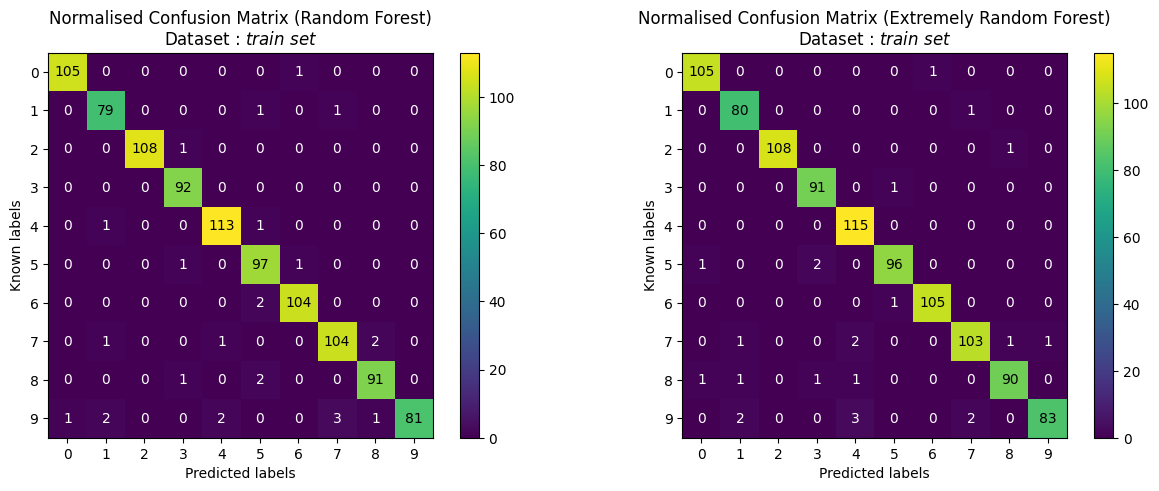

In [10]:
# Comparaison des résultats sur EMNIST sur le train_set
emnist_conf_matrix2 = confusion_matrix(Emnist.class_number, emnist_train_y,
                                       emnist_train_prediction_forest)
emnist_conf_matrix_extr2 = confusion_matrix(Emnist.class_number, emnist_train_y,
                                            emnist_train_prediction_forest_extr)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.set_title("Normalised Confusion Matrix (Random Forest)\nDataset : $train\ set$")
show_confusion_matrix(emnist_conf_matrix2, Emnist.class_names, ax=ax1)

ax2.set_title("Normalised Confusion Matrix (Extremely Random Forest)\nDataset : $train\ set$")
show_confusion_matrix(emnist_conf_matrix_extr2, Emnist.class_names, ax=ax2)

print(
    f"Accuracy score normal Random Forest : {accuracy_score(emnist_train_y, emnist_train_prediction_forest):.3f}")
print(
    f"Accuracy score extremely Random Forest : {accuracy_score(emnist_train_y, emnist_train_prediction_forest_extr):.3f}")

### Conclusions

On observe que la différence de précision s'est bien attenuée (de 0.08 à 0.005 en Accuracy).
On observe autant d'_overfitting_.
Random Forest, sur 100 arbres avec un subset de 250 features pour 1000 éléments et un ordinateur X, s'exécute en 4min.
Tandis que Extremely Random Forest, avec les mêmes conditions, s'exécute en 3min.
Tout ça pour simplement dire, que cela nous fait gagner en complexité, nous l'avions déjà observé puisque ce qui prend le plus de calcul, c'est de trouver le seuil à chaque noeud.